In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np



In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
data = pd.read_csv('/content/drive/MyDrive/50_Startups.csv')
print(data.head())

   R&D Spend  Administration  Marketing Spend       State     Profit
0  165349.20       136897.80        471784.10    New York  192261.83
1  162597.70       151377.59        443898.53  California  191792.06
2  153441.51       101145.55        407934.54     Florida  191050.39
3  144372.41       118671.85        383199.62    New York  182901.99
4  142107.34        91391.77        366168.42     Florida  166187.94


# New Section

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [ ]:
data.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
R&D Spend,50.0,73721.6156,45902.256482,0.00,39936.3700,73051.080,101602.8000,165349.20
Administration,50.0,121344.6396,28017.802755,51283.14,103730.8750,122699.795,144842.1800,182645.56
Marketing Spend,50.0,211025.0978,122290.310726,0.00,129300.1325,212716.240,299469.0850,471784.10
Profit,50.0,112012.6392,40306.180338,14681.40,90138.9025,107978.190,139765.9775,192261.83


In [9]:
data.drop_duplicates(inplace=True)

In [14]:
data.shape

(50, 5)

In [13]:
data.isnull().sum()

,0
R&D Spend,0
Administration,0
Marketing Spend,0
State,0
Profit,0


In [15]:
data.isnull().sum()[data.isnull().sum()>0]/data.shape[0]*100


,0


In [16]:
data.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')

In [17]:
data.dtypes

,0
R&D Spend,float64
Administration,float64
Marketing Spend,float64
State,object
Profit,float64


In [18]:
data.isnull().sum()[data.isnull().sum()>0]

,0


In [19]:
from sklearn.preprocessing import LabelEncoder

In [20]:
label_encoder = LabelEncoder()

In [21]:
print(label_encoder)

LabelEncoder()


In [22]:
data['State'] = label_encoder.fit_transform(data['State'])

In [23]:
data=pd.get_dummies(data,drop_first=True)

In [24]:
X = data.drop(columns = 'Profit')
X


,R&D Spend,Administration,Marketing Spend,State
0,165349.20,136897.80,471784.10,2
1,162597.70,151377.59,443898.53,0
2,153441.51,101145.55,407934.54,1
3,144372.41,118671.85,383199.62,2
4,142107.34,91391.77,366168.42,1
5,131876.90,99814.71,362861.36,2
6,134615.46,147198.87,127716.82,0
7,130298.13,145530.06,323876.68,1
8,120542.52,148718.95,311613.29,2
9,123334.88,108679.17,304981.62,0


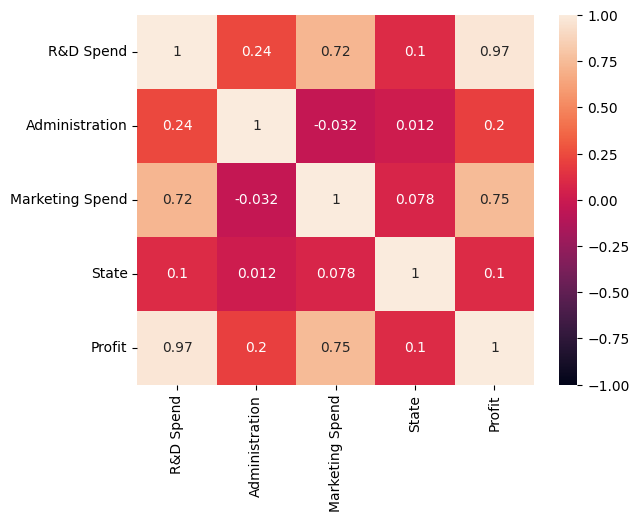

In [25]:
sns.heatmap(data.corr(),vmin=-1,annot=True)
plt.show()

In [26]:
data_eda = data.copy()

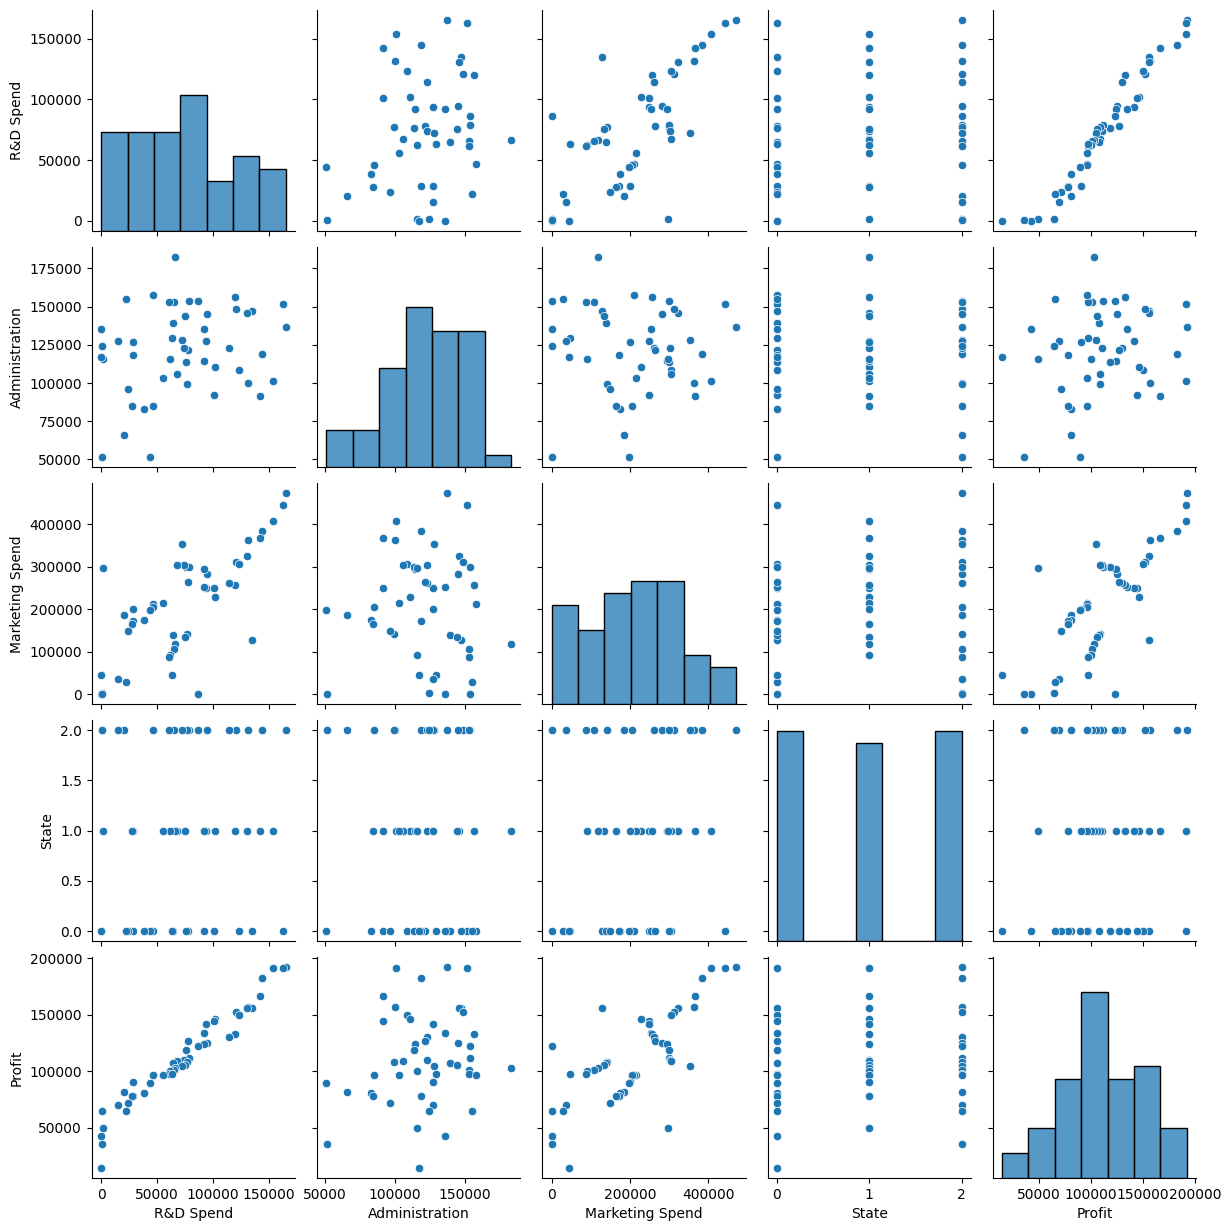

In [27]:
sns.pairplot(data_eda)
plt.show()

<Figure size 1000x900 with 0 Axes>

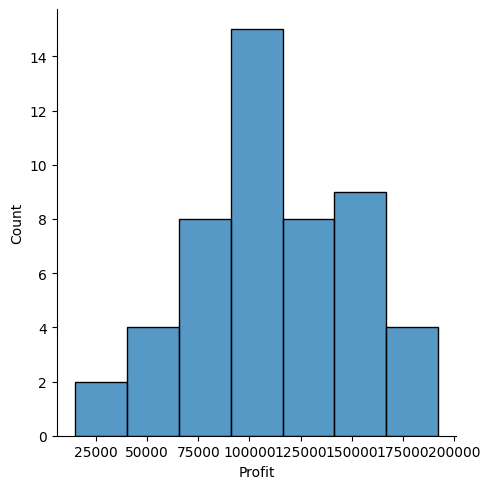

In [28]:
plt.figure(figsize =(10,9))
sns.displot(x=data.Profit,data=data)
plt.show()

In [29]:
data.Administration.value_counts(normalize=True)

,proportion
Administration,
136897.80,0.02
51283.14,0.02
127864.55,0.02
182645.56,0.02
153032.06,0.02
115641.28,0.02
152701.92,0.02
129219.61,0.02
103057.49,0.02


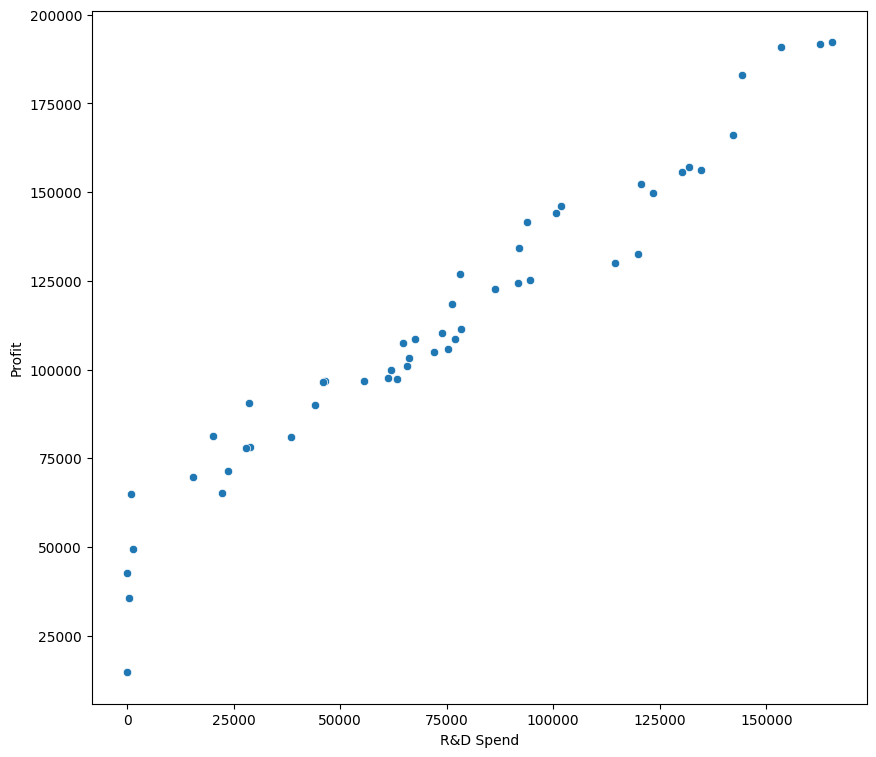

In [30]:
plt.figure(figsize =(10,9))
sns.scatterplot(x='R&D Spend', y='Profit', data=data)
plt.show()

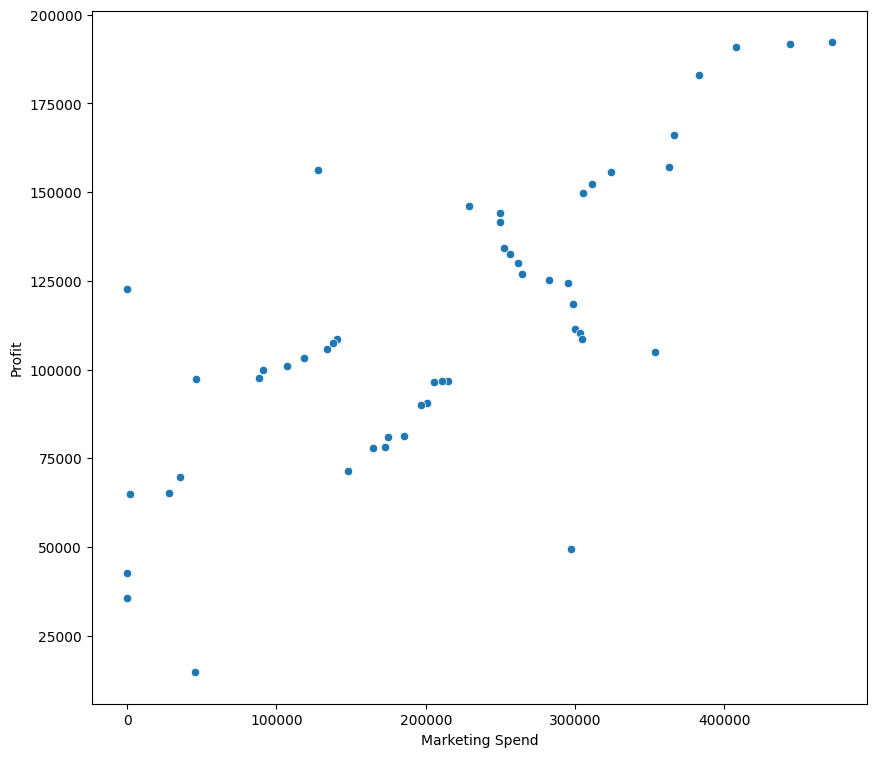

In [31]:
plt.figure(figsize =(10,9))
sns.scatterplot(x='Marketing Spend', y='Profit', data=data)
plt.show()

In [32]:
X = data[['R&D Spend', 'Administration',	'Marketing Spend', 'State']]
X.head(3)

,R&D Spend,Administration,Marketing Spend,State
0,165349.20,136897.80,471784.10,2
1,162597.70,151377.59,443898.53,0
2,153441.51,101145.55,407934.54,1


In [33]:
y = data[['Profit']]
y.head(2)

,Profit
0,192261.83
1,191792.06


In [34]:
from sklearn.model_selection import train_test_split

In [35]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=101)


In [36]:
from sklearn.linear_model import ElasticNet


In [37]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [38]:
models = [('ElasticNet', ElasticNet())]
for name, model in models:
    print(name)
    print()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print("r2 score", r2_score(y_test, y_pred))
    print("\n")
    print("mean absolute error:", mean_absolute_error(y_test, y_pred))
    print("\n")
    print("mean squared error:", mean_squared_error(y_test, y_pred))
    print("\n")

ElasticNet

r2 score 0.9482560069602344


mean absolute error: 6803.2566017337895


mean squared error: 75183536.88696651


